#  regression 


 DataSet: California Housing Prices

متوسط أسعار المنازل لمقاطعات كاليفورنيا عام 1990.
إنه بمثابة مقدمة ممتازة لتنفيذ خوارزميات التعلم الآلي لأنه يتطلب تنظيفًا بدائيًا للبيانات

تحتوي البيانات على معلومات من تعداد عام 1990 في ولاية كاليفورنيا. لذلك ، على الرغم من أنه قد لا يساعدك في التنبؤ بأسعار المساكن الحالية مثل مجموعة بيانات Zillow Zestimate ، إلا أنه يوفر مجموعة بيانات تمهيدية يمكن الوصول إليها لتعليم الأشخاص أساسيات التعلم الآلي.

In [1]:
%matplotlib notebook
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

تتعلق البيانات بالمنازل الموجودة في منطقة معينة في كاليفورنيا وبعض الإحصائيات الموجزة عنها بناءً على بيانات تعداد عام 1990,الأعمدة كالتالي :

1. longitude: مقياس لمدى غرب المنزل ؛ أعلى قيمة في أقصى الغرب
2. latitude: مقياس لمدى شمال المنزل. أعلى قيمة في أقصى الشمال
3. housingMedianAge: متوسط العمر لمنزل داخل مبنى. الرقم الأقل هو مبنى أحدث
4. totalRooms: إجمالي عدد الغرف داخل مبنى
5. totalBedrooms: إجمالي عدد غرف النوم داخل المبنى
6. population: إجمالي عدد الأشخاص المقيمين داخل المبنى
7. households: إجمالي عدد الأسر ، مجموعة من الأشخاص المقيمين داخل وحدة منزلية ، في كتلة
8. medianIncome: متوسط الدخل للأسر داخل كتلة من المنازل (يقاس بعشرات الآلاف من الدولارات الأمريكية)
9. medianHouseValue: متوسط قيمة المنزل للأسر المعيشية داخل الكتلة (مُقاسة بالدولار الأمريكي)
10. oceanProximity: موقع المنزل w.r.t المحيط / البحر

In [2]:
from sklearn.datasets import fetch_california_housing
data = pd.read_table('housing.csv', sep=',', na_values='?')
print(" data_shape  :",data.shape)
data.head()


 data_shape  : (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data_refine = data.drop('ocean_proximity', axis = 1)
data_refine.shape

(20640, 9)

In [4]:
data_refine = data_refine.dropna(axis = 0)
data_refine.shape

(20433, 9)

In [5]:
X = data_refine.drop('median_house_value', axis = 1)
y = data_refine['median_house_value']

In [6]:
print(X.shape)
print(y.shape)

(20433, 8)
(20433,)


###  [1]      Simple Linear Regression

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)
print('Training set size: {}'
     .format(X_train.shape[0]))
print('Test set size: {}'
     .format(X_test.shape[0]))

linreg = LinearRegression().fit(X_train, y_train)

Training set size: 15324
Test set size: 5109


تم تقسيم الداتا الى قسمين فقط قسم للتدريب وقسم للاختبار
ومن ثم تدريب الموديل على مجموعة التدريب 

In [8]:
print('housing dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

housing dataset
linear model intercept: -3632532.4175680103
linear model coeff:
[-4.31988447e+04 -4.27768055e+04  1.18666549e+03 -7.77697149e+00
  1.15465615e+02 -3.61132343e+01  3.79479632e+01  4.00729935e+04]
R-squared score (training): 0.637
R-squared score (test): 0.637


قيمة R-squared score  متساوية على كل من مجموعة التدريب ومجموعة الاختبار 

تقريبا لا يوجد حالة overfiting 
سيتم تجريب عمليات  regularization لتاكد من عدم وجودة حالة overfiting 

### Ridge regression


In [9]:
from sklearn.linear_model import Ridge

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('housing dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

housing dataset
ridge regression linear model intercept: -3614316.495516094
ridge regression linear model coeff:
[-4.29857266e+04 -4.25776294e+04  1.19009458e+03 -7.79671041e+00
  1.15169604e+02 -3.61211788e+01  3.84435533e+01  4.00849091e+04]
R-squared score (training): 0.637
R-squared score (test): 0.637
Number of non-zero features: 8


لم تتغير قيمة R-squared score 
وبالتالي لم يحدث اي تغيير وبالتالي ليس هنالك فائدة من تطبيق الRidge 


 ### Feature Normalization 

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [11]:
X_test_scaled = scaler.transform(X_test)

In [12]:
linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('housing dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

housing dataset
ridge regression linear model intercept: 284654.1322310165
ridge regression linear model coeff:
[-318951.03109166 -298053.59460233   69078.62576534   -1734.38073438
  130535.24039823 -152464.66485962   80205.07539589  530918.91853427]
R-squared score (training): 0.601
R-squared score (test): 0.596
Number of non-zero features: 8


عند تطبيق Feature Normalization  انخفضت قيمة R-squared score وبالتالي هنالك حالة underfiting 
لنجرب تغير قيمة الalpha 

#### Ridge regression with regularization parameter: alpha

In [13]:
print('Ridge regression: effect of alpha regularization parameter\n')
all_alphas = [0, 1, 10, 20, 50, 100, 1000]
all_r2_train = []
all_r2_test = []
for this_alpha in all_alphas:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    all_r2_train.append(r2_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    all_r2_test.append(r2_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 8, r-squared training: 0.64, r-squared test: 0.64

Alpha = 1.00
num abs(coeff) > 1.0: 8, r-squared training: 0.63, r-squared test: 0.63

Alpha = 10.00
num abs(coeff) > 1.0: 8, r-squared training: 0.61, r-squared test: 0.61

Alpha = 20.00
num abs(coeff) > 1.0: 8, r-squared training: 0.60, r-squared test: 0.60

Alpha = 50.00
num abs(coeff) > 1.0: 8, r-squared training: 0.58, r-squared test: 0.57

Alpha = 100.00
num abs(coeff) > 1.0: 8, r-squared training: 0.54, r-squared test: 0.53

Alpha = 1000.00
num abs(coeff) > 1.0: 8, r-squared training: 0.21, r-squared test: 0.21



افضل قيمة عندما Alpha = 0.00
اي ان عملية ال regularization لم تعطي اي فائدة وانما عملية  Feature Normalization هي من ساعدت على ارتفاع قيمة 
R-squared score  

<IPython.core.display.Javascript object>


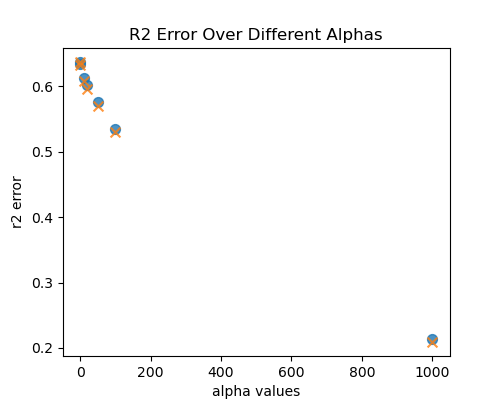

In [14]:
plt.figure(figsize=(5,4))
alphas = all_alphas
plt.scatter(alphas, all_r2_train, marker= 'o', s=50, alpha=0.8)
plt.scatter(alphas, all_r2_test, marker= 'x', s=50, alpha=0.8)
plt.title('R2 Error Over Different Alphas')
plt.xlabel('alpha values')
plt.ylabel('r2 error')
plt.show()

### Lasso regression

In [15]:
from sklearn.linear_model import Lasso

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('housing dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

housing dataset
lasso regression linear model intercept: 368702.7162097058
lasso regression linear model coeff:
[ -433763.59244656  -401304.86738827    60586.79079544  -294883.39061391
   738108.0411076  -1276631.90741868   222189.45584153   580058.94965436]
Non-zero features: 8
R-squared score (training): 0.637
R-squared score (test): 0.637

Features with non-zero weight (sorted by absolute magnitude):
	population, -1276631.907
	total_bedrooms, 738108.041
	median_income, 580058.950
	longitude, -433763.592
	latitude, -401304.867
	total_rooms, -294883.391
	households, 222189.456
	housing_median_age, 60586.791


لم تتغير قيمة R-squared score 
لنجرب قيمة اخرى لل alpha

#### Lasso regression with regularization parameter: alpha

In [16]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')
all_alphas = [0.5, 1, 2, 3, 5, 10, 20, 50]
all_r2_train = []
all_r2_test = []
for alpha in all_alphas:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    all_r2_train.append(r2_train)
    all_r2_test.append(r2_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 8, r-squared training: 0.64, r-squared test: 0.64

Alpha = 1.00
Features kept: 8, r-squared training: 0.64, r-squared test: 0.64

Alpha = 2.00
Features kept: 8, r-squared training: 0.64, r-squared test: 0.64

Alpha = 3.00
Features kept: 8, r-squared training: 0.64, r-squared test: 0.64

Alpha = 5.00
Features kept: 8, r-squared training: 0.64, r-squared test: 0.64

Alpha = 10.00
Features kept: 8, r-squared training: 0.64, r-squared test: 0.64

Alpha = 20.00
Features kept: 8, r-squared training: 0.64, r-squared test: 0.63

Alpha = 50.00
Features kept: 8, r-squared training: 0.63, r-squared test: 0.63



كان هنالك فائدة من تطبيق  laso 


<IPython.core.display.Javascript object>


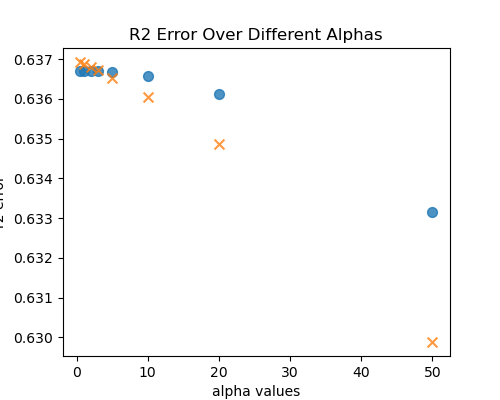

In [17]:
plt.figure(figsize=(5,4))
alphas = all_alphas
plt.scatter(alphas, all_r2_train, marker= 'o', s=50, alpha=0.8)
plt.scatter(alphas, all_r2_test, marker= 'x', s=50, alpha=0.8)
plt.title('R2 Error Over Different Alphas')
plt.xlabel('alpha values')
plt.ylabel('r2 error')
plt.show()

# [2] Ploynomial Regression

تغير فضاء العينات من فضاء خطي الى فضاء غير خطي (من الدرجة الثانية) 

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y,random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

(poly deg 2) linear model coeff (w):
[-5.09138729e-03  7.37431501e+05  1.06573208e+06 -7.96132571e+04
  9.83056471e+02 -4.48532120e+03  4.68544815e+02 -1.66364058e+03
 -9.23407211e+05  5.00912981e+03  1.33102445e+04 -9.52122101e+02
  1.25348725e+01 -6.23279880e+01  7.70198230e+00 -2.03366347e+01
 -1.18183916e+04  7.59176686e+03 -1.00011564e+03  1.29403633e+01
 -7.52636662e+01  1.28559260e+01 -2.39945508e+01 -1.21909425e+04
  2.43027192e+01 -1.74700424e-01  3.36417725e+00 -1.34046977e+00
  2.27358870e+00  1.44139198e+02 -1.91479098e-03  2.38637611e-02
 -5.27623997e-03  1.68167018e-02  8.76791573e+00 -1.03587846e-01
  5.50108140e-02 -1.36225553e-01 -2.60582452e+01  3.26753308e-03
 -5.10868536e-02 -4.55904181e+00  1.25281452e-01  2.67201242e+00
 -2.40700789e+03]
(poly deg 2) linear model intercept (b): 25673841.281
(poly deg 2) R-squared score (training): 0.701
(poly deg 2) R-squared score (test): 0.691



### Ridge regression

In [19]:
from sklearn.linear_model import Ridge

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('housing dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

housing dataset
ridge regression linear model intercept: -3978147.682936733
ridge regression linear model coeff:
[ 0.00000000e+00 -3.10515933e+04  6.74948691e+04 -6.04050955e+04
 -2.09660627e+02  3.19730926e+03  5.32812854e+02 -3.84806589e+03
 -7.23153647e+04  3.05773825e+02  2.33872116e+03 -7.30477966e+02
 -1.42484952e+00  2.90396143e+01  8.38718388e+00 -4.70480618e+01
 -1.80192776e+03  2.74325825e+03 -8.00539549e+02 -2.45712932e-01
  1.60635611e+01  1.34524353e+01 -5.41026809e+01 -2.61233922e+03
  2.19262012e+01 -3.19575739e-01  4.06555186e+00 -1.38474217e+00
  2.41693802e+00  2.35474618e+02 -1.49138744e-03  3.46434619e-02
 -4.68827385e-03 -1.37055888e-03  7.28358438e+00 -1.98965090e-01
  3.90712047e-02  6.19890161e-02 -2.94513889e+01  3.02168980e-03
 -3.52958571e-02 -5.44743359e+00  4.14572018e-02  1.89425030e+01
 -1.95929611e+03]
R-squared score (training): 0.690
R-squared score (test): 0.685
Number of non-zero features: 44


 ### Feature Normalization 

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train) 

X_test_scaled = scaler.transform(X_test)

In [21]:
linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('housing dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

housing dataset
ridge regression linear model intercept: 195763.05696947512
ridge regression linear model coeff:
[      0.         -185536.4737069  -149185.88093166  -17443.36532321
  -40576.05100015   41727.1300462   -94356.61320011    4898.24435422
  173666.12196473  183897.45639269   72547.87143502    5378.01023206
   38480.47142062  -42466.8933955    95094.56554272   -6285.32622257
 -173134.72316339 -136562.75255837  -48086.62626083  -39848.05785968
   35666.67603727 -101579.84667138    -719.71827271  144297.80767987
   63025.57922616   31585.82801977  154693.82617806 -161064.30892332
  115468.72778943  121431.58789186  -10674.7362225   -11319.33821227
   -6356.16697732  -12560.99759582   38494.00569263   -5764.27359914
   -3199.27870974   -5767.89930661  101083.24135093    7185.09778054
   -3148.07321708  -80329.97831735   -6388.74598101   70674.72788598
  -21160.74646474]
R-squared score (training): 0.640
R-squared score (test): 0.634
Number of non-zero features: 44


#### Ridge regression with regularization parameter: alpha

In [22]:
print('Ridge regression: effect of alpha regularization parameter\n')
all_alphas = [0, 1, 10, 20, 50, 100, 1000]
all_r2_train = []
all_r2_test = []
for this_alpha in all_alphas:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    all_r2_train.append(r2_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    all_r2_test.append(r2_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 45, r-squared training: 0.70, r-squared test: 0.69

Alpha = 1.00
num abs(coeff) > 1.0: 44, r-squared training: 0.67, r-squared test: 0.66

Alpha = 10.00
num abs(coeff) > 1.0: 44, r-squared training: 0.65, r-squared test: 0.65

Alpha = 20.00
num abs(coeff) > 1.0: 44, r-squared training: 0.64, r-squared test: 0.63

Alpha = 50.00
num abs(coeff) > 1.0: 44, r-squared training: 0.62, r-squared test: 0.61

Alpha = 100.00
num abs(coeff) > 1.0: 44, r-squared training: 0.60, r-squared test: 0.59

Alpha = 1000.00
num abs(coeff) > 1.0: 44, r-squared training: 0.42, r-squared test: 0.41



### Lasso regression

In [23]:
from sklearn.linear_model import Lasso

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('housing dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

housing dataset
lasso regression linear model intercept: 2385706.012827892
lasso regression linear model coeff:
[       0.          -684631.92250922  -338416.55549945  -480473.60342185
 -1222084.92153198   906153.01625239    -9025.43035248       -0.
  -409144.20374533   -99637.64077912   915408.15941079  -899298.91087153
        0.               -0.                0.                0.
 -1756790.13615153   790815.12504575  -590347.29549318       -0.
        0.                0.          -299667.35124641  -696412.08646297
    81870.01970866  -172325.15157658   716476.20385055  -535921.7570602
   129949.36879668   247299.39808019        0.                0.
       -0.           861704.4361191   1107095.12161614 -1125472.08613316
       -0.               -0.            26735.00801735  1044294.62845776
       -0.          -584467.02299221       -0.            71091.89035152
  -364805.74697103]
Non-zero features: 29
R-squared score (training): 0.680
R-squared score (test): 0.675

Features wi

#### Lasso regression with regularization parameter: alpha


In [24]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')
all_alphas = [0.5, 1, 2, 3, 5, 10, 20, 50]
all_r2_train = []
all_r2_test = []
for alpha in all_alphas:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    all_r2_train.append(r2_train)
    all_r2_test.append(r2_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 38, r-squared training: 0.69, r-squared test: 0.68

Alpha = 1.00
Features kept: 33, r-squared training: 0.68, r-squared test: 0.68

Alpha = 2.00
Features kept: 29, r-squared training: 0.68, r-squared test: 0.67

Alpha = 3.00
Features kept: 27, r-squared training: 0.68, r-squared test: 0.67

Alpha = 5.00
Features kept: 24, r-squared training: 0.68, r-squared test: 0.67

Alpha = 10.00
Features kept: 18, r-squared training: 0.67, r-squared test: 0.67

Alpha = 20.00
Features kept: 17, r-squared training: 0.67, r-squared test: 0.66

Alpha = 50.00
Features kept: 13, r-squared training: 0.66, r-squared test: 0.66



# [3] Support  vector Regression

 هي مجموعة نقاط البيانات الأقرب على المستوي الفائق وهي بمثابة نقاط ذات أهمية كبيرة في عملية تصنيف البيانات لأن من خلالها يتم تحديد المستوي الفائق الأفضل في عملية فصل البيانات، بالتالي إزالتها أو تغيير موقعها يتطلب تحديد مستوى فائق آخر من جديد.

In [25]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
  

print(data.keys())

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [26]:
# train the model on train set
model = SVC()
model.fit(X_train, y_train)
  
# print prediction results
# predictions = model.predict(X_test)
# print(classification_report(y_test, predictions))

SVC()

In [ ]:
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=11.7min


In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# [4]  Decision Tree Regression

In [ ]:
# Thank You :) 